In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data= pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis_clean.csv")

Question 1: Show DataFrame info

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unnamed:_0                     10910 non-null  int64  
 1   customer                       10910 non-null  object 
 2   state                          10910 non-null  object 
 3   customer_lifetime_value        10910 non-null  float64
 4   response                       10910 non-null  object 
 5   coverage                       10910 non-null  object 
 6   education                      10910 non-null  object 
 7   effective_to_date              10910 non-null  object 
 8   employmentstatus               10910 non-null  object 
 9   gender                         10910 non-null  object 
 10  income                         10910 non-null  int64  
 11  location_code                  10910 non-null  object 
 12  marital_status                 10910 non-null 

In [4]:
data.shape

(10910, 27)

Question 2: Describe Dataframe

In [5]:
data.describe()

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,5454.500000,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330,1.466728
std,3149.590053,6885.081434,30359.195670,34.442532,9.783520,27.940675,0.885589,2.399359,292.180556,0.498915
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,2727.250000,4014.453113,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,271.082527,1.000000
50%,5454.500000,5771.147235,33813.500000,83.000000,15.000000,48.000000,0.000000,2.000000,382.564630,1.000000
75%,8181.750000,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.384256,4.000000,547.200000,2.000000
max,10909.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


Question 3: Show a plot of the total number of responses.


In [6]:
data['response'].value_counts()

response
No     9444
Yes    1466
Name: count, dtype: int64

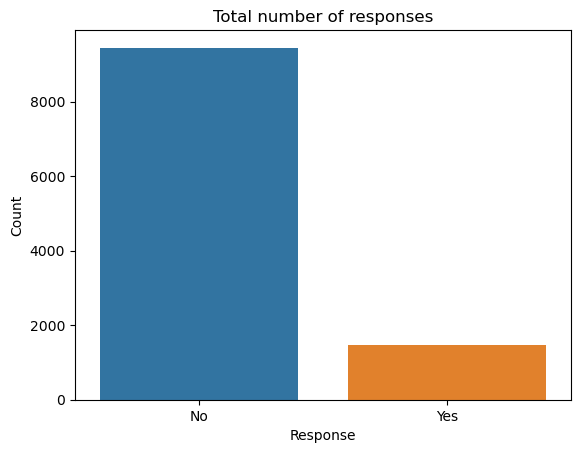

In [20]:
fig, ax = plt.subplots()
sns.countplot(data=data, x="response", ax=ax)
ax.set_xlabel("Response")
ax.set_ylabel("Count")
ax.set_title("Total number of responses")
plt.show()

Question 4: Show a plot of the response rate by the sales channel.

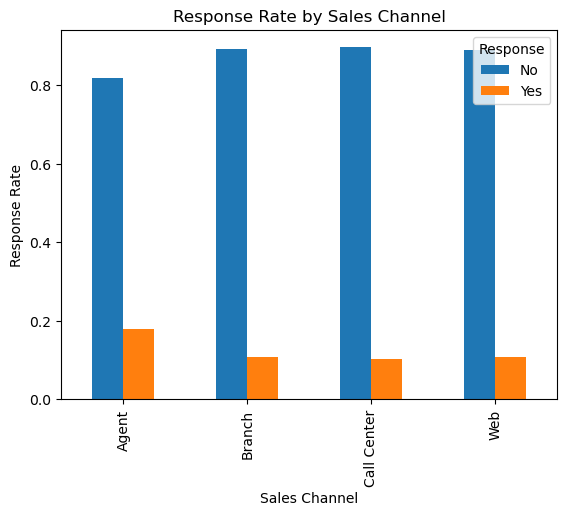

In [22]:
# Calculating the response rate by sales channel
response_rate = data.groupby('sales_channel')['response'].value_counts(normalize=True).unstack().fillna(0)

response_rate.plot(kind='bar') 
plt.title('Response Rate by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Response Rate')
plt.legend(title='Response', loc='upper right')
plt.show()

Question 5: Show a plot of the response rate by the total claim amount.

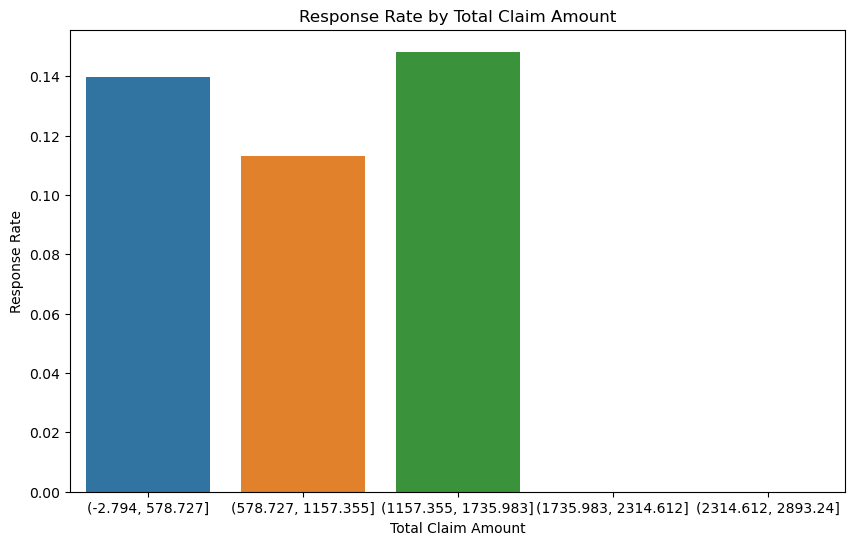

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(x=pd.cut(data['total_claim_amount'], bins=5), y=data['response'].apply(lambda x: 1 if x == 'Yes' else 0), estimator='mean', errorbar=None)
plt.title('Response Rate by Total Claim Amount')
plt.xlabel('Total Claim Amount')
plt.ylabel('Response Rate')
plt.show()

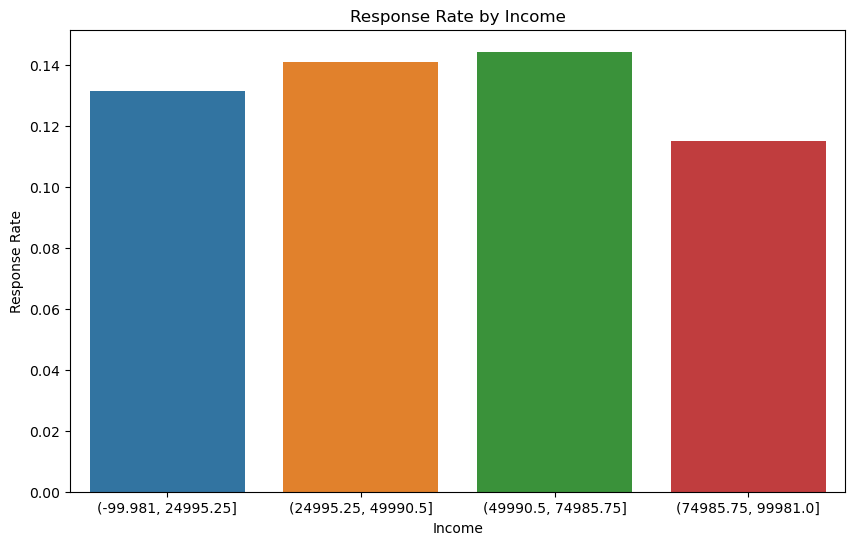

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(x=pd.cut(data['income'], bins=4), y=data['response'].apply(lambda x: 1 if x == 'Yes' else 0), estimator='mean', errorbar=None)
plt.title('Response Rate by Income')
plt.xlabel('Income')
plt.ylabel('Response Rate')
plt.show()